In [1]:
import torch
from torch import nn
import torch.utils.data as Data
import torch.optim as optim
import numpy as np
from os.path import join as PJ
import matplotlib.pyplot as plt 

In [2]:
from torch.utils.data import Dataset
from torchvision import transforms
from PIL import Image,ImageOps

In [3]:
import tensorflow as tf

In [5]:
def LoadFiles(mode="train"):
    if mode == "train":
        with open(TrainFile, 'r') as trainf:
            image_info = trainf.readlines()
            image_info = [path.strip().split() for path in image_info]
            image_info = np.asarray(image_info)

            # Split to image path and label
            image_paths = image_info[:, 0]
            label_ids = image_info[:, 1].astype(int)

#             labels = tf.one_hot(label_ids, num_class, dtype=tf.int32)
            print("in Load : ", label_ids.shape)
            return image_paths, label_ids
    else:
        with open(TestFile, 'r') as testf:
            image_info = testf.readlines()
            image_info = [path.strip().split() for path in image_info]
            image_info = np.asarray(image_info)

            # Split to image path and label
            image_paths = image_info[:, 0]
            label_ids = image_info[:, 1].astype(int)
#             labels = tf.one_hot(label_ids, num_class, dtype=tf.int32)
            return image_paths, label_ids

In [6]:
import cv2
class TermiteDataset(Dataset):
    def __init__(self, data_file, transform):
        
        with open(data_file, 'r') as f:
            image_info = f.readlines()
        image_info = [path.strip().split() for path in image_info]
        image_info = np.asarray(image_info)

        # Split to image path and label
        self.image_paths = image_info[:, 0]
        self.label_ids = image_info[:, 1].astype(int)
        self.transform = transform
        
    def __len__(self):
        return len(self.image_paths)

    def __getitem__(self, idx):
#         print(idx, self.label_ids.shape, self.label_ids[idx])
        label = self.label_ids[idx]
        image_path = self.image_paths[idx]
        original_image = Image.open(image_path).convert('RGB')
        
#         print(original_image.size)
        
        if original_image.size[0] > 1000:
            original_image = original_image.resize((1000, original_image.size[1]*1000//original_image.size[0]))
        elif original_image.size[1] > 1000:
            original_image = original_image.resize((original_image.size[0]*1000//original_image.size[1], 1000))
#         print(original_image.shape)
        left = 500-original_image.size[0]//2
        right = 500-original_image.size[0]//2
        top = 500-original_image.size[1]//2
        bottom = 500-original_image.size[1]//2
        
        if left + right + original_image.size[0] != 1000:
            right = 1000 - left - original_image.size[0]
        if top + bottom + original_image.size[1] != 1000:
            top = 1000 - bottom - original_image.size[1]
        
#         original_image= cv2.copyMakeBorder(original_image,left,right,top,bottom,cv2.BORDER_CONSTANT,value=(0, 0, 0))
        original_image = ImageOps.expand(original_image, border=(left,top,right,bottom), fill=0)##left,top,right,bottom
        original_image = original_image.resize((130,130))
        transform1 = transforms.Compose([transforms.ToTensor()])
        original_image = transform1(original_image)
#         print(original_image.shape)
        
        
#         original_image = self.transform(original_image)
#         original_image.permute(2,0,1)
#         print(original_image.shape, answer.shape)
        return label, original_image, self.image_paths[idx]

def transform_set(train, new_size=None, pad=None):
    """
    train: True or False
    new_size: int or tuple
    
    """
#     transform_list = [transforms.ToTensor(),
#                       transforms.Normalize([0.5, 0.5, 0.5], [0.5, 0.5, 0.5])]
    transform_list = [transforms.ToTensor()]
    # replace centercrop to padding
#     transform_list = [transforms.CenterCrop((crop_h, crop_w))] + transform_list if crop else transform_list
#     transform_list = [transforms.Resize(new_size)] + transform_list if new_size is not None else transform_list

#     transform_list = [transforms.RandomHorizontalFlip()] + transform_list if train else transform_list
    transform = transforms.Compose(transform_list)
    return transform

In [7]:
def CheckFile(filename):
    with open(filename, 'r') as f:
            image_info = f.readlines()
    image_info = [path.strip().split() for path in image_info]
    image_info = np.asarray(image_info)
    counts = {"台灣土白蟻兵蟻" : 0,
             "台灣土白蟻工蟻" : 0,
             "台灣家白蟻兵蟻" : 0,
             "台灣家白蟻工蟻" : 0,
             "截頭堆沙兵蟻" : 0,
             "截頭堆沙工蟻" : 0,
             "黃肢散工蟻" : 0,
             "黃肢散兵蟻" : 0,}
        
    Locations = {"L1" : 0,
             "L2" : 0,
             "L3" : 0}
    for line in image_info:
        path = line[0]
        if "L1" in path:
            Locations["L1"] += 1
        if "L2" in path:
            Locations["L2"] += 1
        if "L3" in path:
            Locations["L3"] += 1
        if "台灣土白蟻兵蟻" in path:
            counts["台灣土白蟻兵蟻"] += 1
        if "台灣土白蟻工蟻" in path:
            counts["台灣土白蟻工蟻"] += 1
        if "台灣家白蟻兵蟻" in path:
            counts["台灣家白蟻兵蟻"] += 1
        if "台灣家白蟻工蟻" in path:
            counts["台灣家白蟻工蟻"] += 1
        if "截頭堆沙兵蟻" in path:
            counts["截頭堆沙兵蟻"] += 1
        if "截頭堆沙工蟻" in path:
            counts["截頭堆沙工蟻"] += 1
        if "黃肢散兵蟻" in path:
            counts["黃肢散兵蟻"] += 1
        if "黃肢散工蟻" in path:
            counts["黃肢散工蟻"] += 1
    print(Locations, counts)

In [8]:
BATCH_SIZE = 64
EPOCH = 164
LearningRate = 0.0001
Momentum = 0.9
TrainFile = "/home/ytliu/Termite-Bonnie/PAPER_termite/BENCHMARK-LARGE_Ind_trainfile_army_2.txt"
ValFile = "/home/ytliu/Termite-Bonnie/PAPER_termite//BENCHMARK-LARGE_Ind_valfile_army_2.txt"
TestFile = "/home/ytliu/Termite-Bonnie/PAPER_termite/BENCHMARK-LARGE_Ind_testfile_army_2.txt"
classes = ["O.f Army","C.f Army","C.d Army", "R.f Army"]
model_directory = "/home/ytliu/Termite-Bonnie/PAPER_termite/*BENCH_test_time2/"

In [9]:
print("TrainFile : ", TrainFile)
print("ValidationFile : ", ValFile)
print("TestFile : ", TestFile)
CheckFile(TrainFile)
CheckFile(ValFile)
CheckFile(TestFile)

TrainFile :  /home/ytliu/Termite-Bonnie/PAPER_termite/BENCHMARK-LARGE_Ind_trainfile_army_2.txt
ValidationFile :  /home/ytliu/Termite-Bonnie/PAPER_termite//BENCHMARK-LARGE_Ind_valfile_army_2.txt
TestFile :  /home/ytliu/Termite-Bonnie/PAPER_termite/BENCHMARK-LARGE_Ind_testfile_army_2.txt
{'L1': 3200, 'L2': 0, 'L3': 3200} {'台灣土白蟻兵蟻': 1600, '台灣土白蟻工蟻': 0, '台灣家白蟻兵蟻': 1600, '台灣家白蟻工蟻': 0, '截頭堆沙兵蟻': 1600, '截頭堆沙工蟻': 0, '黃肢散工蟻': 0, '黃肢散兵蟻': 1600}
{'L1': 800, 'L2': 0, 'L3': 800} {'台灣土白蟻兵蟻': 400, '台灣土白蟻工蟻': 0, '台灣家白蟻兵蟻': 400, '台灣家白蟻工蟻': 0, '截頭堆沙兵蟻': 400, '截頭堆沙工蟻': 0, '黃肢散工蟻': 0, '黃肢散兵蟻': 400}
{'L1': 0, 'L2': 4000, 'L3': 0} {'台灣土白蟻兵蟻': 1000, '台灣土白蟻工蟻': 0, '台灣家白蟻兵蟻': 1000, '台灣家白蟻工蟻': 0, '截頭堆沙兵蟻': 1000, '截頭堆沙工蟻': 0, '黃肢散工蟻': 0, '黃肢散兵蟻': 1000}


In [10]:
import torchvision.models as models
import os
# from MobileNetV2 import MobileNetV2
print(torch.__version__)
# torch.cuda.set_device(0)
print(torch.cuda.current_device())
# mobilenet =  MobileNetV2(n_class=len(classes)).cuda()
mobilenet =  nn.Sequential(models.mobilenet_v2(pretrained=True), nn.Linear(1000, len(classes))).cuda()

1.3.0
0


In [11]:
model = mobilenet
# model = MobileNet(len(classes))
# model.to(cuda)
# model = model.cuda()
model = model
criterion = nn.CrossEntropyLoss()
optimizer = optim.SGD(model.parameters(), lr=LearningRate, momentum=Momentum)

In [12]:
transform = transform_set(train=True)
trainset = TermiteDataset(TrainFile, transform)
trainloader = Data.DataLoader(
    dataset=trainset,      # torch TensorDataset format
    batch_size=BATCH_SIZE,      # mini batch size
    shuffle=True,               # 要不要打乱数据 (打乱比较好)
    num_workers=0,              # 多线程来读数据
)

In [13]:
transform2 = transform_set(train=False)
valset = TermiteDataset(ValFile, transform2)
valloader = Data.DataLoader(
    dataset=valset,      # torch TensorDataset format
    batch_size=BATCH_SIZE,      # mini batch size
    shuffle=True,               # 要不要打乱数据 (打乱比较好)
    num_workers=0,              # 多线程来读数据
)

In [14]:
# for labels, images in loader:
#     print(labels.shape)
#     print(images.shape)
#     ssssss

# TRAIN
### 
### validation

Train
[1, 00020] loss: 24.399 acc: 0.509
[1, 00040] loss: 33.379 acc: 0.680
[1, 00060] loss: 38.610 acc: 0.758
[1, 00080] loss: 42.364 acc: 0.804
[1, 00100] loss: 45.437 acc: 0.833
[0.83328125]
[45.43700136244297]


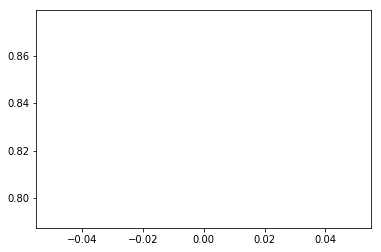

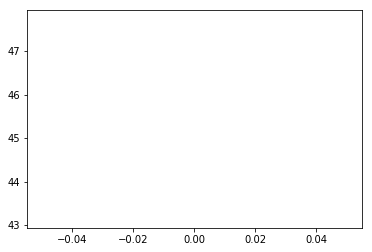

Validation
[0.96125]
[3.2958939597010612]


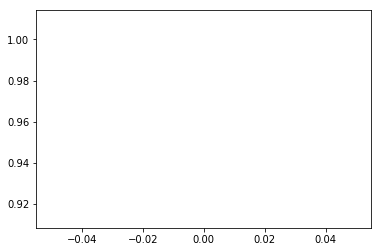

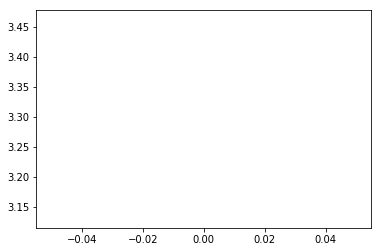


[1] accuracy: 0.961 loss: 3.296

64.80799603462219
Train
[2, 00020] loss: 2.111 acc: 0.970
[2, 00040] loss: 3.937 acc: 0.971
[2, 00060] loss: 5.605 acc: 0.972
[2, 00080] loss: 7.114 acc: 0.974
[2, 00100] loss: 8.782 acc: 0.975
[0.83328125, 0.97453125]
[45.43700136244297, 8.782282751053572]


KeyboardInterrupt: 

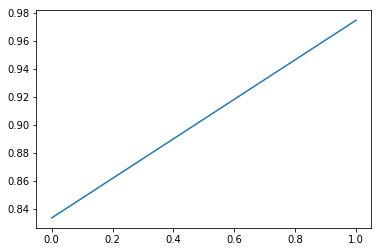

In [15]:
train_acc = []
train_loss = []
val_acc = []
val_loss = []
import time
start = time.time()
for epoch in range(EPOCH):
    print("Train")
    total = 0
    correct = 0
    running_loss = 0.0
    for step, (labels, images,_) in enumerate(trainloader):
        optimizer.zero_grad()
#         print("in Train: ", images.shape, labels.shape)
#         images = images.detach()
#         labels = labels.detach()
        images = images.detach().cuda()
        labels = labels.detach().cuda()
        outputs = model(images)
        
        # loss
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()
        running_loss += loss.item()
        
        # accuracy
        _, predicted = torch.max(outputs.data, 1)
        total += labels.size(0)
        correct += (predicted == labels).sum().item()
        acc = correct / total

        if step % 20 == 19:    # print every 2000 mini-batches
            print('[%d, %05d] loss: %.3f acc: %.3f' %
                  (epoch + 1, step + 1, running_loss, acc))

    train_acc.append(acc)
    train_loss.append(running_loss)
    print(train_acc)
    print(train_loss)
    plt.figure()
    plt.plot(range(0,epoch+1), train_acc)
    plt.savefig(model_directory + "train_acc_E%03d.jpg" % (epoch+1), dpi=500)
    plt.show()
    plt.figure()
    plt.plot(range(0,epoch+1), train_loss)
    plt.savefig(model_directory + "train_loss_E%03d.jpg" % (epoch+1), dpi=500)
    plt.show()
    
    # Evaluate validation set
    print("Validation")
    total = 0
    correct = 0
    running_loss = 0.0
    for step, (labels, images,_) in enumerate(valloader):
        optimizer.zero_grad()
        images = images.detach().cuda()
        labels = labels.detach().cuda()
#         images = images.detach()
#         labels = labels.detach()
        outputs = model(images)
        loss = criterion(outputs, labels)
        _, predicted = torch.max(outputs.data, 1)
        running_loss += loss.item()
        total += labels.size(0)
        correct += (predicted == labels).sum().item()
        acc = correct / total
    
    val_acc.append(acc)
    val_loss.append(running_loss)
    print(val_acc)
    print(val_loss)
    plt.figure()
    plt.plot(range(0,epoch+1), val_acc)
    plt.savefig(model_directory + "val_acc_E%03d.jpg" % (epoch+1), dpi=500)
    plt.show()
    plt.figure()
    plt.plot(range(0,epoch+1), val_loss)
    plt.savefig(model_directory + "val_loss_E%03d.jpg" % (epoch+1), dpi=500)
    plt.show()
    
    print('\n[%d] accuracy: %.3f loss: %.3f\n' % (epoch + 1, acc, running_loss))
    running_loss = 0.0
    # Saving model
    model_path = PJ(model_directory, "%03d_weights.pt" % (epoch+1))
    torch.save(model.state_dict(), model_path)
    print(time.time() - start)

In [16]:
resultfile = open(model_directory+"train_results.txt", "a")
resultfile.write("train")
resultfile.write(str(train_acc))
resultfile.write("\n")
resultfile.write(str(train_loss))
resultfile.write("\n")
resultfile.write("validation")
resultfile.write("\n")
resultfile.write(str(val_acc))
resultfile.write("\n")
resultfile.write(str(val_loss))
resultfile.write("\n")
resultfile.close()

# TEST
### evaluate
### test every model
### saliency map

In [16]:
transform = transform_set(train=False)
testset = TermiteDataset(TestFile, transform)
testloader = Data.DataLoader(
    dataset=testset,      # torch TensorDataset format
    batch_size=BATCH_SIZE,      # mini batch size
    shuffle=True,               # 要不要打乱数据 (打乱比较好)
    num_workers=0,              # 线程来读数据
)


[1] accuracy: 0.921 loss: 14.844

[0.921]
[14.843939952552319]


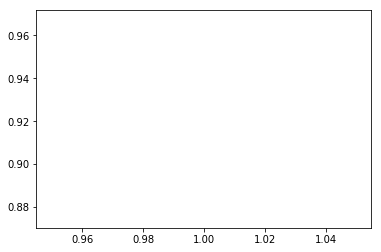

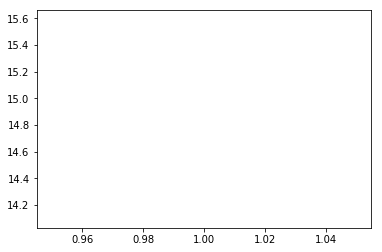

[0, 1, 0, 1, 3, 3, 1, 3, 1, 1, 1, 1, 0, 3, 2, 1, 0, 0, 0, 0, 0, 1, 0, 1, 1, 1, 1, 1, 3, 2, 0, 0, 2, 3, 0, 0, 0, 1, 1, 0, 1, 0, 2, 2, 1, 0, 1, 2, 2, 0, 2, 1, 3, 0, 1, 1, 1, 0, 1, 2, 2, 3, 0, 1, 1, 1, 3, 0, 0, 3, 1, 1, 2, 1, 3, 0, 0, 1, 3, 0, 0, 2, 1, 1, 1, 1, 0, 2, 1, 3, 1, 1, 1, 2, 2, 3, 2, 3, 1, 1, 3, 0, 1, 3, 1, 0, 3, 1, 1, 2, 3, 1, 2, 0, 1, 0, 3, 2, 1, 0, 2, 1, 0, 1, 1, 0, 0, 1, 1, 0, 0, 3, 2, 0, 1, 1, 1, 1, 0, 0, 2, 0, 0, 2, 0, 1, 0, 0, 1, 1, 1, 1, 3, 1, 1, 1, 0, 1, 1, 0, 3, 1, 0, 0, 3, 0, 0, 1, 1, 3, 0, 1, 2, 1, 0, 1, 1, 0, 0, 3, 0, 1, 1, 1, 2, 1, 1, 1, 2, 1, 2, 3, 1, 2, 1, 1, 1, 0, 0, 0, 1, 0, 0, 2, 1, 1, 2, 1, 2, 0, 1, 1, 2, 1, 1, 1, 1, 2, 3, 0, 3, 0, 1, 1, 1, 1, 1, 1, 1, 3, 3, 3, 1, 0, 1, 1, 1, 0, 1, 1, 3, 0, 1, 1, 1, 1, 0, 1, 3, 2, 1, 2, 0, 3, 0, 0, 1, 0, 2, 2, 0, 2, 1, 1, 1, 2, 0, 3, 0, 2, 2, 1, 1, 0, 1, 1, 1, 2, 1, 0, 1, 1, 1, 2, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 0, 0, 3, 0, 1, 1, 1, 0, 1, 0, 0, 0, 1, 2, 1, 0, 1, 0, 2, 2, 1, 0]
             O.f Soldier  C.f Soldier  C.d Soldier 

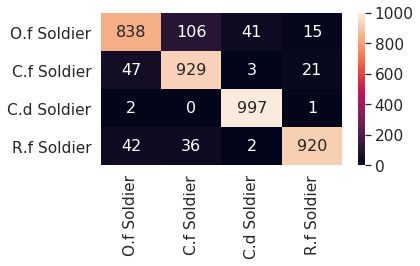

30.614686012268066


RuntimeError: Error(s) in loading state_dict for Sequential:
	size mismatch for 1.weight: copying a param with shape torch.Size([8, 1000]) from checkpoint, the shape in current model is torch.Size([4, 1000]).
	size mismatch for 1.bias: copying a param with shape torch.Size([8]) from checkpoint, the shape in current model is torch.Size([4]).

In [17]:
import seaborn as sn
import pandas as pd
import matplotlib.pyplot as plt
import time
start = time.time()
classes2 = ["O.f Soldier","C.f Soldier", "C.d Soldier", "R.f Soldier"]
test_acc = []
test_loss = []
for model_num in range(1, EPOCH+1):
    wrong_images = []
    wrong_answer = []
    actual_answer = []
    weight_path = model_directory + "%03d_weights.pt" % (model_num)
    state_dict = torch.load(weight_path)
    model.load_state_dict(state_dict)
    running_loss = 0.0
    total = 0
    correct = 0
    confusion_matrix = torch.zeros(len(classes2), len(classes2))
    for step, (labels, images, paths) in enumerate(testloader):
        optimizer.zero_grad()
        images = images.detach().cuda()
        labels = labels.detach().cuda()
        outputs = model(images)
        _, predicted = torch.max(outputs.data, 1)
        # append to the wrong list (test log file)
        for i in range(len(predicted)):
            if predicted[i] != labels[i]:
#                 print(paths[i], predicted[i], labels[i])
                wrong_images.append(paths[i])
                wrong_answer.append(predicted[i].item())
                actual_answer.append(labels[i].item())
        loss = criterion(outputs, labels)
        running_loss += loss.item()
        total += labels.size(0)
        correct += (predicted == labels).sum().item()
        for t, p in zip(labels.view(-1), predicted.view(-1)):
#             print(t.item(), p.item())
#             mapp = {0: 0,
#                     2: 1,
#                     4: 2,
#                     6: 3}
#             confusion_matrix[mapp[t.item()], mapp[p.item()]] += 1
            confusion_matrix[t.item(), p.item()] += 1
    
    acc = correct / total
    print('\n[%d] accuracy: %.3f loss: %.3f\n' % (model_num, acc, running_loss))
    
    test_acc.append(acc)
    test_loss.append(running_loss)
    print(test_acc)
    print(test_loss)
    plt.figure()
    plt.plot(range(1,model_num+1), test_acc)
    plt.savefig(model_directory + "test_acc_E%03d.jpg" % (model_num+1), dpi=500)
    plt.show()
    plt.figure()
    plt.plot(range(1,model_num+1), test_loss)
    plt.savefig(model_directory + "test_loss_E%03d.jpg" % (model_num+1), dpi=500)
    plt.show()
    
    
    print(wrong_answer)
    with open(model_directory + "%03d_wrong.txt" % (model_num), 'w') as wrong:
#         c = zip(wrong_images, wrong_answer, actual_answer)
#         c = sorted(c)
#         (wrong_images, wrong_answer, actual_answer) = zip(*c)
#         print(wrong_images)
        for i in range(len(wrong_images)):
            wrong.write(wrong_images[i] + " " + classes2[wrong_answer[i]] + " " + classes2[actual_answer[i]])
#             print(wrong_images[i] + " " + classes2[wrong_answer[i]] + " " + classes2[actual_answer[i]])
            wrong.write("\n")
        wrong.close()
#     print(confusion_matrix)
    confusion_matrix = confusion_matrix.numpy().astype(int)
#     print(confusion_matrix)
    df_cm = pd.DataFrame(confusion_matrix, index = [i for i in classes2],
                  columns = [i for i in classes2])
    print(df_cm)
    sn.set(font_scale=1.4)#for label size
#     print(classes2)
    img = sn.heatmap(df_cm, annot=True,annot_kws={"size": 16}, fmt="d")
    figure = img.get_figure()
    plt.tight_layout()
    plt.savefig(model_directory + "confusion_matrix_%03d.jpg" % (model_num), dpi=500)
    plt.show()
    print(time.time() - start)


In [19]:
resultfile = open(model_directory+"test_results.txt", "a")
resultfile.write("test")
resultfile.write("\n")
resultfile.write(str(test_acc))
resultfile.write("\n")
resultfile.write(str(test_loss))
resultfile.write("\n")
resultfile.close()
